In [70]:
import numpy as np
import struct
import matplotlib.pyplot as plt

In [71]:
def decode_idx3(dataset_file):
    # read binary data
    bin_data = open(dataset_file, 'rb').read()

    # read headers, the order is: magic number, number of images, height, width
    offset = 0
    fmt_header = '>iiii'
    magic_num, img_num, rows, cols = \
        struct.unpack_from(fmt_header, bin_data, offset)
    print 'magic_num: %d, img_num: %d, image size: %d*%d' % \
          (magic_num, img_num, rows, cols)

    #decode data
    img_size = rows * cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(img_size) + 'B'
    images = np.empty((img_num, rows, cols))
    for i in range(img_num):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset))\
            .reshape((rows, cols))
        offset += struct.calcsize(fmt_image)
        if (i + 1) % 10000 == 0:
            print 'Decoded %d' % (i + 1)
    return images


def decode_idx1(label_file):
    # read binary data
    bin_data = open(label_file, 'rb').read()

    # read headers, the order is: magic number, number of images, height, width
    offset = 0
    fmt_header = '>ii'
    magic_num, img_num = \
        struct.unpack_from(fmt_header, bin_data, offset)
    print 'magic_num: %d, img_num: %d' % (magic_num, img_num)

    #decode data
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(img_num)
    for i in range(img_num):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
        if (i + 1) % 10000 == 0:
            print 'Decoded %d' % (i + 1)
    return labels

In [140]:
train_data_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_data_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

train_dataset = decode_idx3(train_data_file)
train_labels = decode_idx1(train_labels_file)
test_dataset = decode_idx3(test_data_file)
test_labels = decode_idx1(test_labels_file)

magic_num: 2051, img_num: 60000, image size: 28*28


Decoded 10000


Decoded 20000


Decoded 30000


Decoded 40000


Decoded 50000


Decoded 60000
magic_num: 2049, img_num: 60000
Decoded 10000
Decoded 20000
Decoded 30000
Decoded 40000
Decoded 50000
Decoded 60000
magic_num: 2051, img_num: 10000, image size: 28*28


Decoded 10000
magic_num: 2049, img_num: 10000
Decoded 10000


In [141]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

# Preprocessing
# randomize both dataset and labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

In [142]:
# Preprocessing
# Turn pixel to binary
train_dataset = (train_dataset[:,:,:] > 127) * 255.0
test_dataset = (test_dataset[:,:,:] > 127) * 255.0

In [143]:
# Preprocessing
# reshape dataset from 28x28 to 1x784
image_size = 28
num_labels = 10

train_dataset = train_dataset.\
    reshape((train_dataset.shape[0], image_size * image_size))
test_dataset = test_dataset.\
    reshape((test_dataset.shape[0], image_size * image_size))
# reshape labels to [0.0, 1.0, ..., 0.0]
train_labels = np.arange(num_labels) == train_labels[:, None]
test_labels = np.arange(num_labels) == test_labels[:, None]

In [144]:
# Preprocessing
# Zero mean and Normalize
img_range = 255.0;
train_dataset = 1.0 * (train_dataset - img_range / 2) / img_range
test_dataset = 1.0 * (test_dataset - img_range / 2) / img_range

In [145]:
# Preprocessing
# split test dataset to valid and test two parts
valid_dataset = test_dataset[:5000]
valid_labels = test_labels[:5000]
test_dataset = test_dataset[5000:10000]
test_labels = test_labels[5000:10000]

In [120]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import regularizers

# Initialization
batch_size = 128
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0, nesterov=True)
truncatedN = keras.initializers.\
    TruncatedNormal(mean=0.0, stddev=0.05, seed=None)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 1024, kernel_initializer = truncatedN,
                     activation = 'relu', input_dim = image_size*image_size))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 10, kernel_initializer = truncatedN,
                     activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

# Fitting the ANN to the Training set
hist = classifier.fit(train_dataset, train_labels, 
                      batch_size = batch_size, epochs = 60, verbose=2)

Epoch 1/60


12s - loss: 0.9601 - acc: 0.7526
Epoch 2/60


12s - loss: 0.5018 - acc: 0.8636
Epoch 3/60


11s - loss: 0.4229 - acc: 0.8802
Epoch 4/60


11s - loss: 0.3844 - acc: 0.8905
Epoch 5/60


11s - loss: 0.3605 - acc: 0.8976
Epoch 6/60


11s - loss: 0.3423 - acc: 0.9017
Epoch 7/60


11s - loss: 0.3284 - acc: 0.9052
Epoch 8/60


11s - loss: 0.3167 - acc: 0.9086
Epoch 9/60


11s - loss: 0.3057 - acc: 0.9120
Epoch 10/60


11s - loss: 0.2971 - acc: 0.9145
Epoch 11/60


11s - loss: 0.2878 - acc: 0.9169
Epoch 12/60


11s - loss: 0.2805 - acc: 0.9195
Epoch 13/60


11s - loss: 0.2731 - acc: 0.9211
Epoch 14/60


11s - loss: 0.2656 - acc: 0.9239
Epoch 15/60


11s - loss: 0.2592 - acc: 0.9259
Epoch 16/60


11s - loss: 0.2520 - acc: 0.9281
Epoch 17/60


11s - loss: 0.2464 - acc: 0.9297
Epoch 18/60


11s - loss: 0.2402 - acc: 0.9322
Epoch 19/60


11s - loss: 0.2348 - acc: 0.9332
Epoch 20/60


11s - loss: 0.2290 - acc: 0.9354
Epoch 21/60


11s - loss: 0.2242 - acc: 0.9362
Epoch 22/60


11s - loss: 0.2194 - acc: 0.9371
Epoch 23/60


11s - loss: 0.2141 - acc: 0.9397
Epoch 24/60


11s - loss: 0.2096 - acc: 0.9410
Epoch 25/60


11s - loss: 0.2050 - acc: 0.9422
Epoch 26/60


11s - loss: 0.2005 - acc: 0.9435
Epoch 27/60


11s - loss: 0.1965 - acc: 0.9454
Epoch 28/60


11s - loss: 0.1929 - acc: 0.9458
Epoch 29/60


11s - loss: 0.1885 - acc: 0.9481
Epoch 30/60


11s - loss: 0.1846 - acc: 0.9488
Epoch 31/60


11s - loss: 0.1811 - acc: 0.9494
Epoch 32/60


11s - loss: 0.1768 - acc: 0.9508
Epoch 33/60


11s - loss: 0.1745 - acc: 0.9514
Epoch 34/60


11s - loss: 0.1709 - acc: 0.9524
Epoch 35/60


11s - loss: 0.1675 - acc: 0.9535
Epoch 36/60


11s - loss: 0.1645 - acc: 0.9547
Epoch 37/60


11s - loss: 0.1620 - acc: 0.9548
Epoch 38/60


11s - loss: 0.1590 - acc: 0.9558
Epoch 39/60


11s - loss: 0.1556 - acc: 0.9566
Epoch 40/60


11s - loss: 0.1538 - acc: 0.9576
Epoch 41/60


11s - loss: 0.1516 - acc: 0.9584
Epoch 42/60


11s - loss: 0.1486 - acc: 0.9593
Epoch 43/60


11s - loss: 0.1465 - acc: 0.9591
Epoch 44/60


11s - loss: 0.1437 - acc: 0.9605
Epoch 45/60


11s - loss: 0.1411 - acc: 0.9608
Epoch 46/60


11s - loss: 0.1395 - acc: 0.9619
Epoch 47/60


13s - loss: 0.1372 - acc: 0.9625
Epoch 48/60


12s - loss: 0.1349 - acc: 0.9636
Epoch 49/60


11s - loss: 0.1331 - acc: 0.9634
Epoch 50/60


11s - loss: 0.1312 - acc: 0.9642
Epoch 51/60


11s - loss: 0.1287 - acc: 0.9650
Epoch 52/60


11s - loss: 0.1281 - acc: 0.9651
Epoch 53/60


11s - loss: 0.1262 - acc: 0.9657
Epoch 54/60


11s - loss: 0.1244 - acc: 0.9660
Epoch 55/60


11s - loss: 0.1228 - acc: 0.9663
Epoch 56/60


11s - loss: 0.1210 - acc: 0.9672
Epoch 57/60


11s - loss: 0.1195 - acc: 0.9676
Epoch 58/60


11s - loss: 0.1179 - acc: 0.9676
Epoch 59/60


11s - loss: 0.1169 - acc: 0.9681
Epoch 60/60


11s - loss: 0.1145 - acc: 0.9688


In [121]:
# Predicting the Test set results
y_pred_valid = classifier.predict(valid_dataset)
y_pred_test = classifier.predict(test_dataset)

sum = np.sum(np.argmax(y_pred_valid[i]) == np.argmax(valid_labels[i]) 
             for i in range(0, valid_labels.shape[0]))
acc_valid = sum*1.0/5000
sum = np.sum(np.argmax(y_pred_test[i]) == np.argmax(test_labels[i]) 
             for i in range(0, test_labels.shape[0]))
acc_test = sum*1.0/5000

In [123]:
acc_valid

0.96260000000000001

In [125]:
# Save a keras model
from keras.models import load_model
classifier.save_weights('model.hdf5')
with open('model.json', 'w') as f:
    f.write(classifier.to_json())

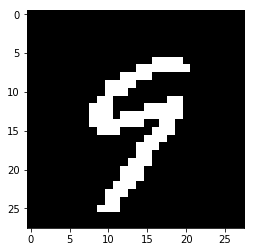

array([False, False, False, False, False, False, False, False, False,  True], dtype=bool)

In [241]:
i = 765
test_dataset = test_dataset.\
    reshape((test_dataset.shape[0], image_size, image_size))
plt.imshow(test_dataset[i], cmap='gray')
plt.show()
test_labels[i]

In [196]:
import scipy.misc
scipy.misc.imsave('scream.jpg', test_dataset[i])

In [242]:
test_dataset = test_dataset.\
    reshape((test_dataset.shape[0], image_size * image_size))
test_data = test_dataset[i]
test_data = np.reshape(test_data, (1,image_size * image_size))
test = classifier.predict(test_data)
test

array([[  2.53082953e-06,   5.94123094e-07,   1.73660931e-06,
          2.05144570e-05,   4.04496258e-03,   4.72685555e-04,
          5.29221643e-06,   9.44128624e-05,   7.49195679e-05,
          9.95282352e-01]], dtype=float32)

In [251]:
from scipy import misc
nine = misc.imread('download.png')
nine = nine[:,:,0].reshape(image_size, image_size)
plt.imshow(nine, cmap='gray')
plt.show()

array([[ 0.00944976,  0.18227126,  0.05826655,  0.0203097 ,  0.01667609,
         0.54963064,  0.0166122 ,  0.13090026,  0.00153703,  0.01434651]], dtype=float32)

In [253]:
nine = np.reshape(nine, (1, image_size * image_size))
nine = 1.0 * (nine - 127.5) / 255.0
test = classifier.predict(nine)
test

array([[ 0.00944976,  0.18227126,  0.05826655,  0.0203097 ,  0.01667609,
         0.54963064,  0.0166122 ,  0.13090026,  0.00153703,  0.01434651]], dtype=float32)

In [249]:
nine.shape

(1, 784)